In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
transaction_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name = 'Transactions')
NewCustomerList_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name = 'NewCustomerList')
CustomerDemographic_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name = 'CustomerDemographic')
CustomerAddress_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name = 'CustomerAddress')


transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# transaction_DataSet

In [3]:
print('The Rows and Columns in Transaction_df Dataset are: ', transaction_df.shape)

The Rows and Columns in Transaction_df Dataset are:  (20000, 26)


In [4]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [5]:
transaction_df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In the dataset we have few Useless columns which is not required for further analysis so we can drop that because columns does not have any values or info,

In [6]:
# checking miising data
total = transaction_df.isnull().sum()
percent  = (transaction_df.isnull().sum()*100/transaction_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],keys = ['Total','Percentage of Missing Values'],axis = 1)
missing_data

,Total,Percentage of Missing Values
transaction_id,0,0.000
product_id,0,0.000
customer_id,0,0.000
transaction_date,0,0.000
online_order,360,1.800
order_status,0,0.000
brand,197,0.985
product_line,197,0.985
product_class,197,0.985
product_size,197,0.985


we can see there are few columns which have no data(ie.100% missing value) not going to help for further analysis, hence we can drop that columns.

In [7]:
transaction_df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [8]:
# Droping Useless columns
cls_d = ['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25']
df = transaction_df.drop(cls_d,axis = 1)
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [9]:
# checking data shape after droping unwanted columns 
print('The Rows and Columns in Transaction_df Dataset are: ', df.shape)

The Rows and Columns in Transaction_df Dataset are:  (20000, 13)


In [10]:
df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [11]:
df_cat = df.select_dtypes(include = object)
df_cat

,order_status,brand,product_line,product_class,product_size
0,Approved,Solex,Standard,medium,medium
1,Approved,Trek Bicycles,Standard,medium,large
2,Approved,OHM Cycles,Standard,low,medium
3,Approved,Norco Bicycles,Standard,medium,medium
4,Approved,Giant Bicycles,Standard,medium,large
...,...,...,...,...,...
19995,Approved,OHM Cycles,Standard,high,medium
19996,Approved,Solex,Road,medium,medium
19997,Approved,OHM Cycles,Standard,medium,medium
19998,Approved,OHM Cycles,Standard,high,medium


In [12]:
df['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [13]:
df['brand'].value_counts()


Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

Solex brand contributing the most

In [14]:
df['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [15]:
df['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [16]:
# check is there any dublicate value in data.
dublicate_1 = df.duplicated()
df[dublicate_1].sum()

transaction_id             0.0
product_id                 0.0
customer_id                0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

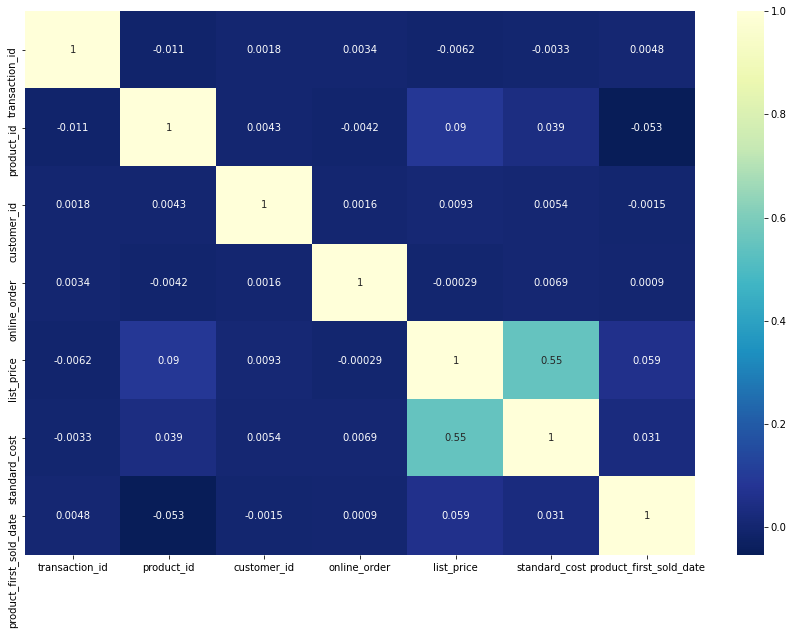

In [17]:
df_corr = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(df_corr,annot = True, cmap = 'YlGnBu_r')
plt.show()

# NewCustomerList_DataSet

In [18]:
NewCustomerList_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.75,0.9375,1.171875,0.996094,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,1.10,1.1000,1.375000,1.168750,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.67,0.6700,0.670000,0.670000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.51,0.6375,0.637500,0.637500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.88,0.8800,1.100000,1.100000,4,4,1.703125


In [19]:
print('The Rows and Columns in NewCustomerList_df Dataset are: ', NewCustomerList_df.shape)

The Rows and Columns in NewCustomerList_df Dataset are:  (1000, 23)


In [20]:
NewCustomerList_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [21]:
# checking miising data
total = NewCustomerList_df.isnull().sum()
percent  = (NewCustomerList_df.isnull().sum()*100/NewCustomerList_df.isnull().count()).sort_values(ascending=False)
missing_data_1 = pd.concat([total,percent],keys = ['Total','Percentage of Missing Values'],axis = 1)
missing_data_1

,Total,Percentage of Missing Values
first_name,0,0.0
last_name,29,2.9
gender,0,0.0
past_3_years_bike_related_purchases,0,0.0
DOB,17,1.7
job_title,106,10.6
job_industry_category,165,16.5
wealth_segment,0,0.0
deceased_indicator,0,0.0
owns_car,0,0.0


In [22]:
NewCustomerList_df.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [23]:
df_cat_newcus = NewCustomerList_df.select_dtypes(include = object)
df_cat_newcus.head()

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,state,country
0,Chickie,Brister,Male,General Manager,Manufacturing,Mass Customer,N,Yes,45 Shopko Center,QLD,Australia
1,Morly,Genery,Male,Structural Engineer,Property,Mass Customer,N,No,14 Mccormick Park,NSW,Australia
2,Ardelis,Forrester,Female,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,5 Colorado Crossing,VIC,Australia
3,Lucine,Stutt,Female,Account Representative III,Manufacturing,Affluent Customer,N,Yes,207 Annamark Plaza,QLD,Australia
4,Melinda,Hadlee,Female,Financial Analyst,Financial Services,Affluent Customer,N,No,115 Montana Place,NSW,Australia


In [24]:
NewCustomerList_df.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [25]:
NewCustomerList_df['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [26]:
# Replace 'U' with 'Unidentified'
#NewCustomerList_df['gender'].str.replace('U','Unidentified')
print(NewCustomerList_df['gender'].replace("U","Unidentified"))

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
995      Male
996      Male
997    Female
998      Male
999      Male
Name: gender, Length: 1000, dtype: object


In [27]:
NewCustomerList_df['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [28]:
NewCustomerList_df.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [29]:
# Last Name missing in 29 rows
# DOB is  missing in 17 rows
# Job category & Job title is important factor for further analysis but in both columns there are few missing rows. 

In [30]:
NewCustomerList_df['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [31]:
NewCustomerList_df['job_title'].value_counts()

Associate Professor           15
Environmental Tech            14
Software Consultant           14
Chief Design Engineer         13
Senior Sales Associate        12
                              ..
Administrative Assistant I     1
Staff Accountant I             1
Database Administrator IV      1
Research Assistant I           1
Automation Specialist IV       1
Name: job_title, Length: 184, dtype: int64

In [32]:
# check is there any dublicate value in data.
dublicate_2 = NewCustomerList_df.duplicated()
NewCustomerList_df[dublicate_2].sum()

first_name                             0.0
last_name                              0.0
gender                                 0.0
past_3_years_bike_related_purchases    0.0
job_title                              0.0
job_industry_category                  0.0
wealth_segment                         0.0
deceased_indicator                     0.0
owns_car                               0.0
tenure                                 0.0
address                                0.0
postcode                               0.0
state                                  0.0
country                                0.0
property_valuation                     0.0
Unnamed: 16                            0.0
Unnamed: 17                            0.0
Unnamed: 18                            0.0
Unnamed: 19                            0.0
Unnamed: 20                            0.0
Rank                                   0.0
Value                                  0.0
dtype: float64

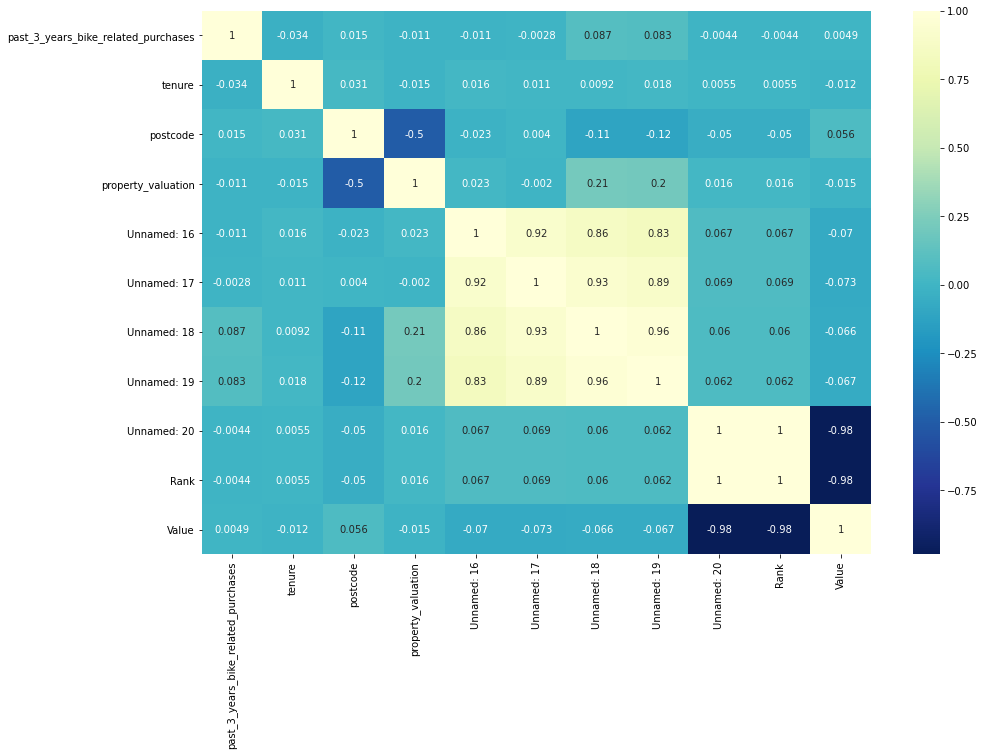

In [33]:
df_corr_2 = NewCustomerList_df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(df_corr_2,annot = True, cmap = 'YlGnBu_r')
plt.show()

# CustomerDemographic_DataSet

In [34]:
CustomerDemographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [35]:
print('The Rows and Columns in CustomerDemographic Dataset are: ', CustomerDemographic_df.shape)

The Rows and Columns in CustomerDemographic Dataset are:  (4000, 13)


In [36]:
CustomerDemographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [37]:
# checking miising data
total = CustomerDemographic_df.isnull().sum()
percent  = (CustomerDemographic_df.isnull().sum()*100/CustomerDemographic_df.isnull().count()).sort_values(ascending=False)
missing_data_2 = pd.concat([total,percent],keys = ['Total','Percentage of Missing Values'],axis = 1)
missing_data_2

,Total,Percentage of Missing Values
customer_id,0,0.000
first_name,0,0.000
last_name,125,3.125
gender,0,0.000
past_3_years_bike_related_purchases,0,0.000
DOB,87,2.175
job_title,506,12.650
job_industry_category,656,16.400
wealth_segment,0,0.000
deceased_indicator,0,0.000


In [38]:
CustomerDemographic_df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

There are Few missing values in last_name, DOB,Job_title,job_title_industry ,default and tenure which may affect the accuracy of model for further analysis.
and as per data default column are not in proper format the way it is needed so we can drop that feature from dataset.

In [39]:
CustomerDemographic_df['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

Manufacturing, Financial Services and Health sector are contributing more.

In [40]:
CustomerDemographic_df['job_title'].value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Legal Assistant                         41
                                        ..
Geologist II                             4
Health Coach I                           3
Research Assistant III                   3
Health Coach III                         3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [41]:
CustomerDemographic_df['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [42]:
# check is there any dublicate value in data.
dublicate_3 = CustomerDemographic_df.duplicated()
CustomerDemographic_df[dublicate_3].sum()

customer_id                            0.0
first_name                             0.0
last_name                              0.0
gender                                 0.0
past_3_years_bike_related_purchases    0.0
job_title                              0.0
job_industry_category                  0.0
wealth_segment                         0.0
deceased_indicator                     0.0
default                                0.0
owns_car                               0.0
tenure                                 0.0
dtype: float64

# CustomerAddress_DataSet

In [43]:
CustomerAddress_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [44]:
print('The Rows and Columns in CustomerAddress Dataset are: ', CustomerAddress_df.shape)

The Rows and Columns in CustomerAddress Dataset are:  (3999, 6)


In [45]:
CustomerAddress_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [46]:
# checking miising data
total = CustomerAddress_df.isnull().sum()
percent  = (CustomerAddress_df.isnull().sum()*100/CustomerAddress_df.isnull().count()).sort_values(ascending=False)
missing_data_3 = pd.concat([total,percent],keys = ['Total','Percentage of Missing Values'],axis = 1)
missing_data_3

,Total,Percentage of Missing Values
customer_id,0,0.0
address,0,0.0
postcode,0,0.0
state,0,0.0
country,0,0.0
property_valuation,0,0.0


In [47]:
# check is there any dublicate value in data.
dublicate_4 = CustomerAddress_df.duplicated()
CustomerAddress_df[dublicate_3].sum()

customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64

In [48]:
CustomerAddress_df['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

Highest number of customer are from NSW.

For Future analysis and modeling we can merge above dataset and make further detail analysis and statistics for profit and try to fit the model.